# Concentration de CO2 dans l'atmosphère depuis 1958

## Bibliotheques 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

## Presentation des donnèes

Les données de l'évolution de la concentration de CO2 dans l'atmosphère sont disponibles du site Web de [l'Institut Scripps](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html). Nous les récupérons sous forme d'un fichier en format CSV. Le fichier contient 10 colonnes. Les colonnes 1-4 donnent les dates en différentes formats. La colonne 5 montre la concentration de CO2 à Mauna Loa en micro-mol per mol (ppm), reporté sur l'échelle 2008A SIO. Les valeurs reportées dans le tableau sont prises à minuit (24:00) du 15 de chaque mois, entre les années 1958 et 2020. La colonne 6 montre la même information de la colonne 5 avec un ajustement pour retirer l'effet quasi régulier saisonnier (4 harmonica fit avec un facteur linéaire de croissance). 
La colonne 7 est une version adouci de la même information de la colonne 5 avec une courbe spline cubique plus une fonction 4-harmonic gain avec facteur linéaire de croissance. La colonne 8 présente la donnée de la colonne 7 sans l'effet du cycle saisonnier. 
Les valeurs manquantes sont indiqués avec "-99.99". La colonne 9 est identique à la colonne 5 avec les valeurs manquantes substitués par les valeurs de colonne 7.  La colonne 10 est identique à la colonne 6 avec les valeurs manquantes substitués par les valeurs de colonne 8.


In [2]:
data_url = "https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv"

In [3]:
raw_data = pd.read_csv(data_url, skiprows=54)
raw_data

Yr   Mn      Date        Date        CO2  seasonally          fit  \
0                                                  adjusted                
1                  Excel                  [ppm]      [ppm]         [ppm]   
2    1958   01     21200   1958.0411     -99.99      -99.99       -99.99   
3    1958   02     21231   1958.1260     -99.99      -99.99       -99.99   
4    1958   03     21259   1958.2027     315.70      314.44       316.18   
5    1958   04     21290   1958.2877     317.45      315.16       317.29   
6    1958   05     21320   1958.3699     317.51      314.71       317.86   
7    1958   06     21351   1958.4548     -99.99      -99.99       317.24   
8    1958   07     21381   1958.5370     315.86      315.19       315.86   
9    1958   08     21412   1958.6219     314.93      316.19       313.99   
10   1958   09     21443   1958.7068     313.21      316.08       312.45   
11   1958   10     21473   1958.7890     -99.99      -99.99       312.43   
12   1958   11     21504   1958.8740     313.33      315.20       313.61   
13   1958   12     21534   1958.9562     314.67      315.43       314.76   
14   1959   01     21565   1959.0411     315.58      315.54       315.62   
15   1959   02     21596   1959.1260     316.49      315.86       316.26   
16   1959   03     21624   1959.2027     316.65      315.38       316.97   
17   1959   04     21655   1959.2877     317.72      315.42       318.08   
18   1959   05     21685   1959.3699     318.29      315.49       318.65   
19   1959   06     21716   1959.4548     318.15      316.03       318.04   
20   1959   07     21746   1959.5370     316.54      315.86       316.67   
21   1959   08     21777   1959.6219     314.80      316.06       314.82   
22   1959   09     21808   1959.7068     313.84      316.73       313.31   
23   1959   10     21838   1959.7890     313.33      316.33       313.32   
24   1959   11     21869   1959.8740     314.81      316.68       314.54   
25   1959   12     21899   1959.9562     315.58      316.35       315.72   
26   1960   01     21930   1960.0410     316.43      316.39       316.61   
27   1960   02     21961   1960.1257     316.98      316.35       317.27   
28   1960   03     21990   1960.2049     317.58      316.28       318.02   
29   1960   04     22021   1960.2896     319.03      316.70       319.14   
..    ...  ...       ...         ...        ...         ...          ...   
728  2018   07     43296   2018.5370     408.90      408.08       409.43   
729  2018   08     43327   2018.6219     407.10      408.63       407.33   
730  2018   09     43358   2018.7068     405.59      409.08       405.66   
731  2018   10     43388   2018.7890     405.99      409.61       405.84   
732  2018   11     43419   2018.8740     408.12      410.38       407.48   
733  2018   12     43449   2018.9562     409.23      410.15       409.07   
734  2019   01     43480   2019.0411     410.92      410.87       410.30   
735  2019   02     43511   2019.1260     411.66      410.90       411.25   
736  2019   03     43539   2019.2027     412.00      410.46       412.25   
737  2019   04     43570   2019.2877     413.52      410.72       413.73   
738  2019   05     43600   2019.3699     414.83      411.42       414.54   
739  2019   06     43631   2019.4548     413.96      411.38       413.91   
740  2019   07     43661   2019.5370     411.85      411.03       412.36   
741  2019   08     43692   2019.6219     410.08      411.62       410.22   
742  2019   09     43723   2019.7068     408.55      412.06       408.49   
743  2019   10     43753   2019.7890     408.43      412.06       408.62   
744  2019   11     43784   2019.8740     410.29      412.56       410.21   
745  2019   12     43814   2019.9562     411.85      412.78       411.76   
746  2020   01     43845   2020.0410     413.37      413.32       412.95   
747  2020   02     43876   2020.1257     414.09      413.33       413.87   
748  2020   03     43905   2020.2049     414.51      41

## Traitement des données

On visualise les noms des colonnes.

In [4]:
list(raw_data.columns) 

['  Yr',
 ' Mn',
 '    Date',
 '      Date',
 '     CO2',
 'seasonally',
 '        fit',
 '  seasonally',
 '      CO2',
 ' seasonally']

On modifie les noms des colonnes, pour mettre au propre le tableau.

In [5]:
raw_data_new = raw_data.rename(columns={'  Yr': 'year',' Mn':'Month','    Date':'data1','      Date':'data2','     CO2':'CO2','seasonally':'seasonally_adjusted','        fit':'fit','  seasonally':'seasonally_adjusted_fit', '      CO2':'CO2_filled',' seasonally':'seasonally_adjusted_filled'})
list(raw_data_new.columns) 

['year',
 'Month',
 'data1',
 'data2',
 'CO2',
 'seasonally_adjusted',
 'fit',
 'seasonally_adjusted_fit',
 'CO2_filled',
 'seasonally_adjusted_filled']

On supprime les premières quatre lignes. Les premières deux lignes sont vides, et les lignes 3 et 4 n'ont pas d'échantillon.

In [6]:
raw_data_new=raw_data_new.drop([0, 1,2,3])

On Supprime le format de data 'data1' et 'data2', qui ne sont pas intéressantes pour notre analyse.

In [7]:
raw_data_new=raw_data_new.drop(columns=['data1', 'data2'])

Nous vérifions qu'il n'y a pas des valeurs nulles dans le tableau.

In [8]:
raw_data_new[raw_data_new.isnull().any(axis=1)]

Empty DataFrame
Columns: [year, Month, CO2, seasonally_adjusted, fit, seasonally_adjusted_fit, CO2_filled, seasonally_adjusted_filled]
Index: []

On voit qu'il n'y a pas des valeurs nulles. On vérifie le type de donné :

In [9]:
raw_data_new.dtypes

year                          object
Month                         object
CO2                           object
seasonally_adjusted           object
fit                           object
seasonally_adjusted_fit       object
CO2_filled                    object
seasonally_adjusted_filled    object
dtype: object

On voit que le tableau est composé par des 'object'. On va le convertir en valeurs numériques.

In [10]:
raw_data_new['year']=raw_data_new['year'].astype(int)
raw_data_new['Month']=raw_data_new['Month'].astype(int)
raw_data_new['CO2'] = pd.to_numeric(raw_data_new['CO2'], errors='coerce').fillna(0)
raw_data_new['seasonally_adjusted'] = pd.to_numeric(raw_data_new['seasonally_adjusted'], errors='coerce').fillna(0)
raw_data_new['fit'] = pd.to_numeric(raw_data_new['fit'], errors='coerce').fillna(0)
raw_data_new['seasonally_adjusted_fit'] = pd.to_numeric(raw_data_new['seasonally_adjusted_fit'], errors='coerce').fillna(0)
raw_data_new['CO2_filled'] = pd.to_numeric(raw_data_new['CO2_filled'], errors='coerce').fillna(0)
raw_data_new['seasonally_adjusted_filled'] = pd.to_numeric(raw_data_new['seasonally_adjusted_filled'], errors='coerce').fillna(0)



On verifie la conversion: 


In [11]:
raw_data_new.dtypes

year                            int64
Month                           int64
CO2                           float64
seasonally_adjusted           float64
fit                           float64
seasonally_adjusted_fit       float64
CO2_filled                    float64
seasonally_adjusted_filled    float64
dtype: object

Les 6 dernières lignes sont vides, on peut les retirer.

In [12]:
raw_data_new=raw_data_new.drop([751,752,753,754,755,756,757])

On peut aussi retirer les lignes sans valeurs :(-99,99)

In [13]:
raw_data_new = raw_data_new.drop(raw_data_new[raw_data_new.CO2 < 0].index)

On réinitialise les index de nos listes.

In [14]:
raw_data_new=raw_data_new.reset_index(drop=True)

## Point 1 - Evolution Annuelle de la CO2
Le graphique suivant nous montrera une oscillation périodique superposée à une évolution systématique plus lente.

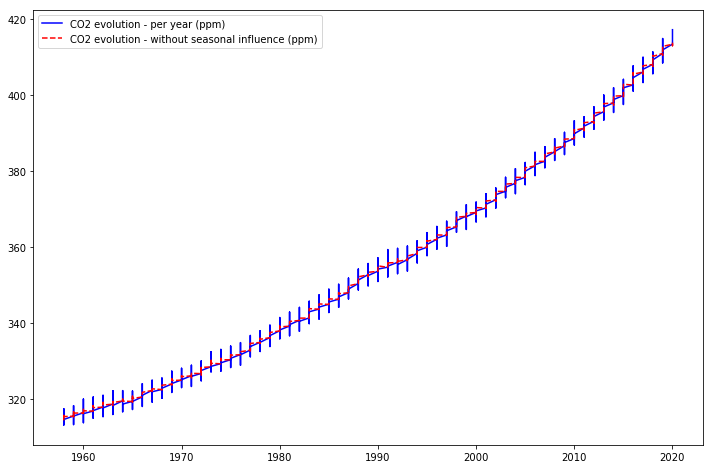

In [15]:
x = raw_data_new['year']
y1 = raw_data_new['CO2_filled']
y2 = raw_data_new['seasonally_adjusted_filled']

fig, ax = plt.subplots()
ax.plot(x, y1, '-b', label='CO2 evolution - per year (ppm)')
ax.plot(x, y2, '--r', label='CO2 evolution - without seasonal influence (ppm)')
leg = ax.legend();
fig.set_size_inches(12, 8)

## Point 2 - Prevision jusq'à 2025


Dans ce paragraphe on va développer un modèle pour prévoir l'évolution de la concentration de CO2 jusqu’au 2025, avec les informations hystériques qu'on a à disposition. 

On peut utiliser la méthode des moindres carrés pour identifier l’évolution linéaire de la tendance montrée en rouge dans le graphique précèdent. La méthode des moindres carrés permet d'identifier la ligne droite qui s'approche le mieux aux différentes points de l'étude. Cette ligne droit présente la forme suivante:


\begin{align}
y=ax+b
\end{align}

La théorie de la méthode des moindres carrées, nous permet de définir la forme des coefficients a et b.

\begin{equation}
a=\frac{N\sum(xy)+\sum(x)\sum(y)}{N\sum(x^2)-(\sum x)^2}
\end{equation}

et

\begin{equation}
b=\frac{\sum(y)- a\sum(x)}{N}
\end{equation}

Le lien suivant nous montre ça dans le détail.(https://www.mathsisfun.com/data/least-squares-regression.html)


Il est intéressant de simplifier cette équation. Pour ce faire on peut rendre 'barycentrique' la série historique, comme montré dans l'image suivante:


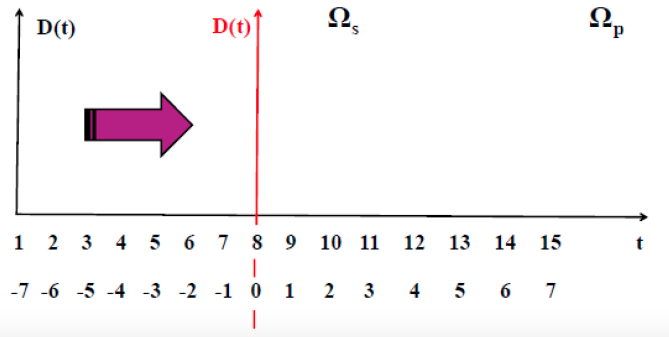

Cette opération nous permet de réduire la complexité des termes 'a' et 'b' car les sommes

\begin{equation}
\sum x
\end{equation}

et

\begin{equation}
(\sum x)^2
\end{equation}

deviennent nulle. Donc on peut calculer a et b avec les formes suivantes:

\begin{equation}
a=\frac{\sum(xy)}{\sum(x^2)}
\end{equation}

et

\begin{equation}
b=\frac{\sum(y)}{N}
\end{equation}

On commence par calculer le terme 'a'. Pour ce faire on réalise un tableau en normalisant les périodes prises dans l'étude: chaque mois représente une période normalisé, on aura donc 744 (12*62 ) périodes, équivalentes à la longueur des vecteurs de 'raw_data_new'.  

On va donc définir tous les opérateurs nécessaires pour calculer a.

In [16]:
x=np.zeros((len(raw_data_new),1))


for i in range(len(raw_data_new)):
    x[0]=-368
    x[i]=x[i-1]+1
    
sumx =len(raw_data_new)
    
y=np.zeros((len(raw_data_new),1))
    
for j in range(len(raw_data_new)):
    y[j]=raw_data_new.seasonally_adjusted_filled[j]
    
    
xy=np.multiply(x,y)
sumxy=np.sum(xy)

x2=np.multiply(x,x)# c'est le vecteur des x^2
sumx2=np.sum(x2)

N=len(raw_data_new)

#on passe a calculer a

a=(sumxy)/(sumx2)
a



0.1511674880564176

La valeure de a est:0.1511674880564176 et ça représente le coefficient angulaire de la ligne droite qu'on cherche à calculer. On passe à calculer b.

In [17]:
b=((sumy))/(N)
b

NameError: name 'sumy' is not defined

On définit donc la ligne droite calculée comme :

\begin{equation}
    y=0.1511674880564176*x+355.3829380053908
\end{equation}

Avec x qui représente une unité temporelle d'un mois. Les 742 mois donnent l'information jusqu’au 2020. Donc pour chercher l'évolution de la concentration de CO2 au 2025, il faut considérer qu'il nous font 5*12 mois, soit 60unité temporelles normalisées. Ces 60 unités temporelles normalisées il faut les sommer aux 371 qui donnent la quantité de CO2 au 2020, en arrivant à 431 unités de temps normalisé. A la fin du 2025, la concentration de CO2 sera:

\begin{equation}
    y=0.1511674880564176*431+355.3829380053908
\end{equation}

Soit, 

In [18]:
y2025=(0.1511674880564176*431)+355.3829380053908

y2025

420.53612535770685

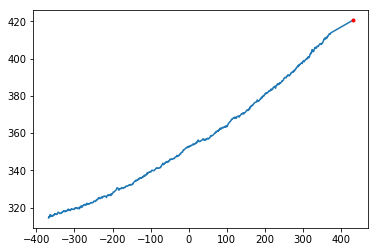

In [19]:
xnew=np.append(x,431)
ynew=np.append(y,y2025)
plt.plot(xnew,ynew)    
plt.plot(431, y2025, marker='o', markersize=3, color="red")

Le point en rouge représente le niveau de concentration de CO2 en ppm à la fin du 2025.